<a href="https://colab.research.google.com/github/Tulio-Freire/EFC1_CPA/blob/main/EFC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 - Complexidade e Projeto de Algoritmos


> **Professor: Douglas H. S. Abreu**


**Alunos**: Tulio Freire - 201611135
            Otavio Augusto de Sousa Resende - 201810543


# Importações e Variáveis globais

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

global_1=0

def arranjos_aleatorios(n):
  a=np.random.randint(0,10, n)
  return a

def arranjo_ordenado(n):
  aOrdenado = np.array(range(1, n, 1))
  return aOrdenado

def arranjo_desordenado(n):
  aDesordenado = np.array(range(n, 0, -1))
  return aDesordenado


# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [ ]:
def insertionSort(arranjo):
  inicio=time.time()
  nComparacoes=1
  for j in range(1, len(arranjo)):
    nComparacoes+=1
    chave=arranjo[j]
    i=j-1
    while i >= 0 and arranjo[i] > chave:
      nComparacoes+=1
      arranjo[i+1]= arranjo[i]
      i=i-1
    arranjo[i+1]=chave

  tempoTotal=time.time()-inicio
  return arranjo, tempoTotal, nComparacoes 



##  Merge Sort


In [ ]:
def mergeSort(arranjo):
  inicio=time.time()
  nComparacoes=1
  if len(arranjo) > 1:
    meio=len(arranjo) // 2
    esquerda=arranjo[:meio]
    direita=arranjo[meio:]

    mergeSort(esquerda)
    mergeSort(direita)

    i=0
    j=0
    aux=0
    nComparacoes+=1
    
    while i < len(esquerda) and j < len(direita):
        if esquerda[i]<=direita[j]:
          arranjo[aux]=esquerda[i]
          i+=1
        else:
          arranjo[aux]=direita[j]
          j+=1
        aux+=1
        nComparacoes+=1

    while i < len(esquerda):
      nComparacoes+=1
      arranjo[aux]=esquerda[i]
      i+=1
      aux+=1

    while j < len(direita):
      nComparacoes+=1
      arranjo[aux]=direita[j]
      j+=1
      aux+=1 

  tempoTotal=time.time()-inicio
  return arranjo, tempoTotal, nComparacoes

##  Selection Sort


In [ ]:
def selectionSort(arranjo):
  inicio = time.time()
  nComparacoes=1
  for aux in range(len(arranjo)):
    menor_indice=aux
    nComparacoes+=1
    
    for i in range(aux + 1, len(arranjo)):
        if arranjo[i] < arranjo[menorIndice]:
          nComparacoes+=1
          menorIndice=i
      
    (arranjo[aux], arranjo[menorIndice])=(arranjo[menorIndice], arranjo[aux])
  
  tempoTotal=time.time()-inicio
  return arranjo, tempoTotal, nComparacoes

##  Bubble Sort


In [ ]:
def bubbleSort(arranjo):
  inicio=time.time()
  numComparacoes=1
  alterado = True
  for i in range(len(arranjo)-1):
    if alterado:
      numComparacoes += 1
      alterado = False
      for j in range(len(arranjo - i)-1):
        numComparacoes += 1
        if arranjo[j] > arranjo[j+1]:
          numComparacoes += 1
          temp = arranjo[j+1]
          arranjo[j+1] = arranjo[j]
          arranjo[j] = temp
          alterado = True

  tempoTotal=time.time()-inicio
  return arranjo, tempoTotal, numComparacoes

## Heap Sort

In [ ]:
def maxHeapify(arranjo, tam, i):
  l=2*i+1
  r=2*i+2

  if l < tam and arranjo[l] > arranjo[i]:
    maior=l
  else:
    maior=i

  if(r < tam and arranjo[r] > arranjo[maior]):
    maior=r

  if(maior != i):
    arranjo[i],arranjo[maior] = arranjo[maior],arranjo[i]
    maxHeapify(arranjo, tam, maior)

def heapSort(arranjo):
  inicio=time.time()
  numComparacoes=1
  tam=len(arranjo)

  for i in range(len(arranjo) // 2 - 1, -1, -1):
    maxHeapify(arranjo, tam, i)
    numComparacoes+=3
    
  for i in range(len(arranjo)-1, 0, -1): 
    arranjo[i], arranjo[0] = arranjo[0], arranjo[i]
    maxHeapify(arranjo, i, 0)
    numComparacoes+=3

  tempoTotal=time.time()-inicio
  return arranjo, tempoTotal, numComparacoes
  

## Quick Sort

> pivo = *A[A-comprimento]*

In [ ]:
def particao(arranjo, inicio, fim, numComparacoes):
  pivo=arranjo[fim]
  i=inicio-1
  for j in range(inicio, fim - 1):
    if arranjo[j] <= pivo:
      numComparacoes+=1
      i=i+1
      arranjo[i], arranjo[j]=arranjo[j], arranjo[i]
  
  arranjo[i+1], arranjo[fim] = arranjo[fim], arranjo[i+1]
  return (i + 1), numComparacoes

def quickSort(arranjo, inicio, fim, numComparacoes):
  if inicio < fim:
    numComparacoes+=1
    meio, numComparacoes=particao(arranjo, inicio, fim, numComparacoes)
    quickSort(arranjo,inicio,meio-1, numComparacoes)
    quickSort(arranjo,meio+1,fim, numComparacoes)

  return arranjo, numComparacoes

def quickSortTotal(arranjo):
  inicio = time.time()
  numComparacoes = 1

  arranjo, numComparacoes = quickSort(arranjo, 0, len(arranjo)-1, numComparacoes)
  tempoTotal=time.time()-inicio
  return arranjo, tempoTotal, numComparacoes

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



##Funções Auxiliares

In [ ]:
# Analise Assintótica
def executarAnalise(qtd_vezes, algoritmo, gerar_arranjo):
  analise_tempo = []
  analise_comparacoes = []

  for i in range(qtd_vezes):
    # Criação do arranjo e ordenação
    arranjo_ordenado, tempo_execucao, comparacoes = algoritmo(gerar_arranjo(i))
    analise_tempo.append(tempo_execucao)
    analise_comparacoes.append(comparacoes)

  return analise_tempo, analise_comparacoes

In [ ]:
def obterGrafico(algoritmo, titulo):
  #Pior caso com o vetor em ordem decrescente
  pior_tempo, pior_comparacoes = executarAnalise(200, algoritmo, gera_arranjo_desordenado)

  #Melhor caso com o vetor já ordenado
  melhor_tempo, melhor_comparacoes = executarAnalise(200, algoritmo, gera_arranjo_ordenado)

  #Caso medio com o vetor com ordem aleatoria
  aleatorio_tempo, aleatorio_comparacoes = executarAnalise(200, algoritmo, gera_arranjos_aleatorios)

  # Plotagem do gráfico
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  line1 = plt.plot(pior_tempo, linewidth=2.0, label="Pior caso")
  line2 = plt.plot(melhor_tempo, linewidth=2.0, label="Melhor caso")
  line3 = plt.plot(aleatorio_tempo, linewidth=2.0, label="Caso aleatório")
  plt.title(f'Análise Assintótica - {titulo}')
  plt.ylabel('Tempo de execução')
  plt.xlabel('Quantidade de análises')
  leg = plt.legend(loc='upper left')
  plt.show()

  return (int)(np.mean(pior_comparacoes)), (int)(np.mean(melhor_comparacoes)), (int)(np.mean(aleatorio_comparacoes))

##Questão 1


###Questão 1 - A e B


####Insertion Sort


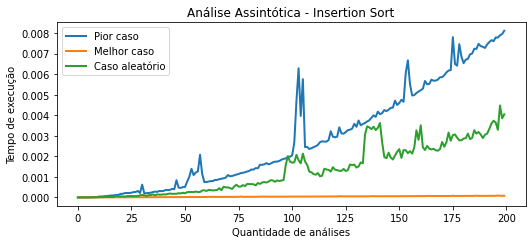

[Comparações - Média]: Pior(6666) Melhor(98) Aleatório(3029)


In [ ]:
pComp, mComp, aComp = obterGrafico(insertionSort, "Insertion Sort")
print(f"[Comparações - Média]: Pior({pComp}) Melhor({mComp}) Aleatório({aComp})")

####Merge Sort

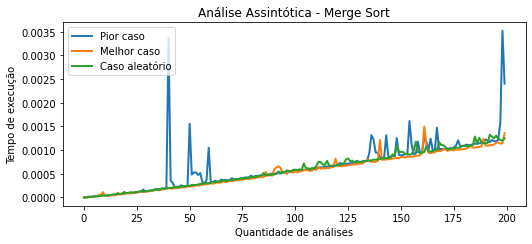

[Comparações - Média]: Pior(101) Melhor(100) Aleatório(101)


In [ ]:
pComp, mComp, aComp = obterGrafico(mergeSort, "Merge Sort")
print(f"[Comparações - Média]: Pior({pComp}) Melhor({mComp}) Aleatório({aComp})")

####Selection Sort

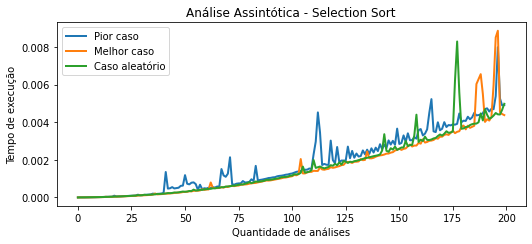

[Comparações - Média]: Pior(3408) Melhor(99) Aleatório(279)


In [ ]:
pComp, mComp, aComp = obterGrafico(selectionSort, "Selection Sort")
print(f"[Comparações - Média]: Pior({pComp}) Melhor({mComp}) Aleatório({aComp})")

####Bubble Sort

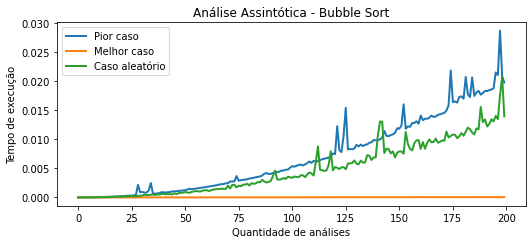

[Comparações - Média]: Pior(19702) Melhor(99) Aleatório(14200)


In [ ]:
pComp, mComp, aComp = obterGrafico(bubbleSort, "Bubble Sort")
print(f"[Comparações - Média]: Pior({pComp}) Melhor({mComp}) Aleatório({aComp})")

####Heap Sort

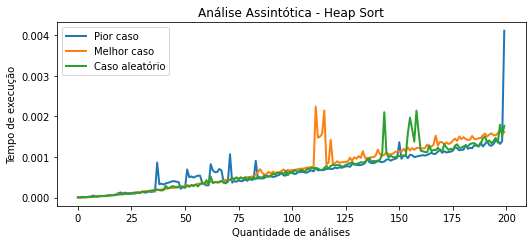

[Comparações - Média]: Pior(445) Melhor(440) Aleatório(445)


In [ ]:
pComp, mComp, aComp = obterGrafico(heapSort, "Heap Sort")
print(f"[Comparações - Média]: Pior({pComp}) Melhor({mComp}) Aleatório({aComp})")

####Quick Sort

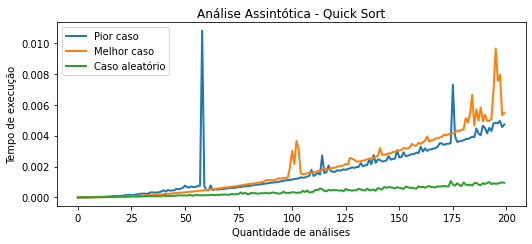

[Comparações - Média]: Pior(1) Melhor(98) Aleatório(57)


In [ ]:
pComp, mComp, aComp = obterGrafico(quickSortTotal, "Quick Sort")
print(f"[Comparações - Média]: Pior({pComp}) Melhor({mComp}) Aleatório({aComp})")

###Questão 1 - C

Merge Sort, Heap Sort e Quick Sort terão seus piores casos com complexidade O(n log n) e nos melhoes casos Ω(n²), pois a cada ordenação realizada pelos algoritmos o arranjo é divido ao meio.

Insetion Sort e o bubble sort é O(n²) no seu pior caso e Ω(n²) no seu melhor caso pois em seu segundo loop o arranjo ira ser percorrido 2 vezes, ou seja, se n equivale ao tamanho do arranjo então ele será percorrido n * n = n². Porem no seu melhor caso ele será Ω(n).

##Questão 2

In [ ]:
def partitionRandom(arranjo, inicio, fim, comparacoes):
  pivoIndex = np.random.randint(inicio, fim)
  pivo = arranjo[pivoIndex]

  i = inicio - 1
  for j in range(inicio, fim - 1):
    if arranjo[j] <= pivo:
      comparacoes += 1
      i = i + 1
      arranjo[i], arranjo[j] = arranjo[j], arranjo[i]
  
  arranjo[i+1], arranjo[fim] = arranjo[fim], arranjo[i+1]
  return (i + 1), comparacoes

def quickSortRandom(arranjo, inicio, fim, comparacoes):
  if inicio < fim:
    comparacoes += 1
    meio, comparacoes = partitionRandom(arranjo, inicio, fim, comparacoes)
    quickSortRandom(arranjo,inicio,meio-1, comparacoes)
    quickSortRandom(arranjo,meio+1,fim, comparacoes)

  return arranjo, comparacoes

def quickSortAleatorio(arranjo):
  tempoInicial = time.time()
  comparacoes = 1

  arranjo, comparacoes = quickSortRandom(arranjo, 0, len(arranjo)-1, comparacoes)
  tempoExecucao = time.time() - tempoInicial
  return arranjo, tempoExecucao, comparacoes

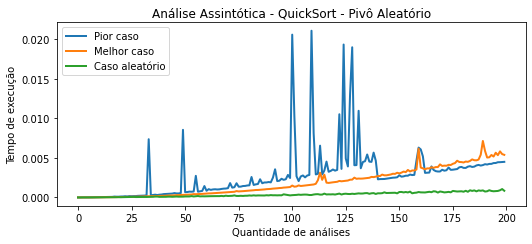

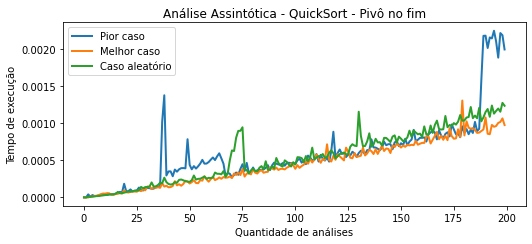

[Comparações (Pivô Aleatório) - Média]: Pior(1) Melhor(98) Aleatório(54)
[Comparações (Pivô no fim) - Média]: Pior(54) Melhor(50) Aleatório(53)


In [ ]:
pComp, mComp, aComp = obterGrafico(quickSortTotal, "QuickSort - Pivô Aleatório")
pComp2, mComp2, aComp2 = obterGrafico(quickSortAleatorio, "QuickSort - Pivô no fim")
print(f"[Comparações (Pivô Aleatório) - Média]: Pior({pComp}) Melhor({mComp}) Aleatório({aComp})")
print(f"[Comparações (Pivô no fim) - Média]: Pior({pComp2}) Melhor({mComp2}) Aleatório({aComp2})")